## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
# import the libraries as shown below
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 100s 1us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 2 steps, validate for 2 steps
Epoch 1/15
2/2 [==============================] - 59s 29s/step - loss: 0.7829 - accuracy: 0.9375 - val_loss: 8.1895 - val_accuracy: 0.3276
Epoch 2/15
2/2 [==============================] - 60s 30s/step - loss: 1.3699 - accuracy: 0.9062 - val_loss: 7.9466 - val_accuracy: 0.3276
Epoch 3/15
2/2 [==============================] - 58s 29s/step - loss: 1.2872 - accuracy: 0.8750 - val_loss: 10.7984 - val_accuracy: 0.3276
Epoch 4/15
2/2 [==============================] - 59s 29s/step - loss: 0.1321 - accuracy: 0.9844 - val_loss: 12.0437 - val_accuracy: 0.3276
Epoch 5/15
2/2 [==============================] - 59s 30s/step - loss: 2.2910e-07 - accuracy: 1.0000 - val_loss: 13.0555 - val_accuracy: 0.3276
Epoch 6/15
2/2 [==============================] - 58s 29s/step - loss: 4.2897e-05 - accuracy: 1.0000 - val_loss: 13.8850 - val_accuracy: 0.3276
Epoch 7/15
2/2 [==============================] - 58s 29s/step - loss: 0.4027 - accuracy: 0.9688 - val_loss: 15.10

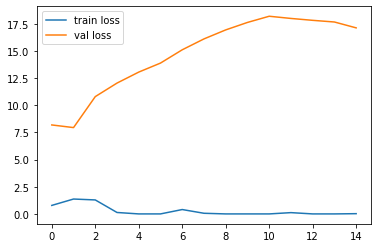

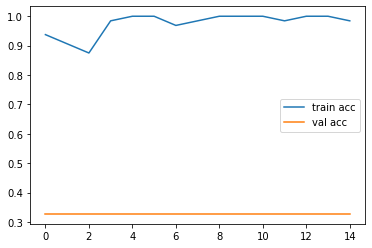

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[1.9615981e-15, 1.5485026e-11, 1.0000000e+00],
       [1.2996022e-15, 5.2157854e-11, 1.0000000e+00],
       [1.1507170e-14, 3.4209496e-10, 1.0000000e+00],
       [4.4173242e-16, 7.4285252e-11, 1.0000000e+00],
       [2.1448490e-15, 8.5891641e-11, 1.0000000e+00],
       [8.8251084e-15, 5.0414778e-10, 1.0000000e+00],
       [2.9489804e-14, 3.2986541e-10, 1.0000000e+00],
       [2.5787867e-15, 1.3168927e-10, 1.0000000e+00],
       [7.4286198e-16, 6.5936347e-11, 1.0000000e+00],
       [3.1248332e-16, 5.4235380e-11, 1.0000000e+00],
       [4.4688340e-15, 2.6739005e-10, 1.0000000e+00],
       [6.0619327e-15, 2.5755589e-10, 1.0000000e+00],
       [9.4204707e-16, 4.6239977e-11, 1.0000000e+00],
       [5.6113106e-16, 4.3577274e-11, 1.0000000e+00],
       [2.9105225e-15, 3.2382474e-10, 1.0000000e+00],
       [5.9130210e-15, 1.0215109e-10, 1.0000000e+00],
       [1.6206606e-15, 3.9920546e-11, 1.0000000e+00],
       [3.1667873e-15, 1.9562749e-10, 1.0000000e+00],
       [4.6015335e-16, 3.418

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [60]:
model=load_model('model_resnet50.h5')

In [61]:
img_data

array([[[[-103.16645 , -116.112335, -123.05255 ],
         [-103.16645 , -116.112335, -123.05255 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         ...,
         [-103.19391 , -116.135864, -123.060394],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        [[-103.17037 , -116.11626 , -123.05647 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         [-103.17429 , -116.12018 , -123.060394],
         ...,
         [-103.19783 , -116.139786, -123.064316],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        [[-103.17037 , -116.11626 , -123.05647 ],
         [-103.17037 , -116.11626 , -123.05647 ],
         [-103.17429 , -116.12018 , -123.060394],
         ...,
         [-103.19783 , -116.139786, -123.064316],
         [-103.20567 , -116.14371 , -123.060394],
         [-103.21352 , -116.15155 , -123.06824 ]],

        ...,

        [[-103.69979 , -116.57116 , -1

In [98]:
img=image.load_img('Datasets/Test/mercedes/27.jpg',target_size=(224,224))



In [99]:
x=image.img_to_array(img)
x

array([[[120., 112.,  89.],
        [117., 106.,  84.],
        [102.,  91.,  69.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[124., 113.,  91.],
        [119., 108.,  86.],
        [105.,  94.,  72.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[127., 116.,  94.],
        [123., 112.,  90.],
        [111., 100.,  78.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[113., 116., 121.],
        [113., 116., 121.],
        [113., 116., 121.],
        ...,
        [152., 155., 160.],
        [152., 155., 160.],
        [152., 155., 160.]],

       [[112., 115., 120.],
        [112., 115., 120.],
        [112., 115., 120.],
        ...,
        [152., 155., 160.],
        [152., 155., 160.],
        [152., 155., 160.]],

       [[112., 115., 120.],
        [112., 115., 120.],
        [112., 1

In [100]:
x.shape

(224, 224, 3)

In [101]:
x=x/255

In [102]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [103]:
model.predict(img_data)

array([[1.7359177e-06, 3.5683757e-01, 6.4316070e-01]], dtype=float32)

In [95]:
a=np.argmax(model.predict(img_data), axis=1)

In [96]:
a==2

array([ True])